<a href="https://colab.research.google.com/github/asilbek-data-scientist/2_modul/blob/main/5_modul_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn # sklearn library
import matplotlib.pyplot as plt

In [2]:
URL = 'https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


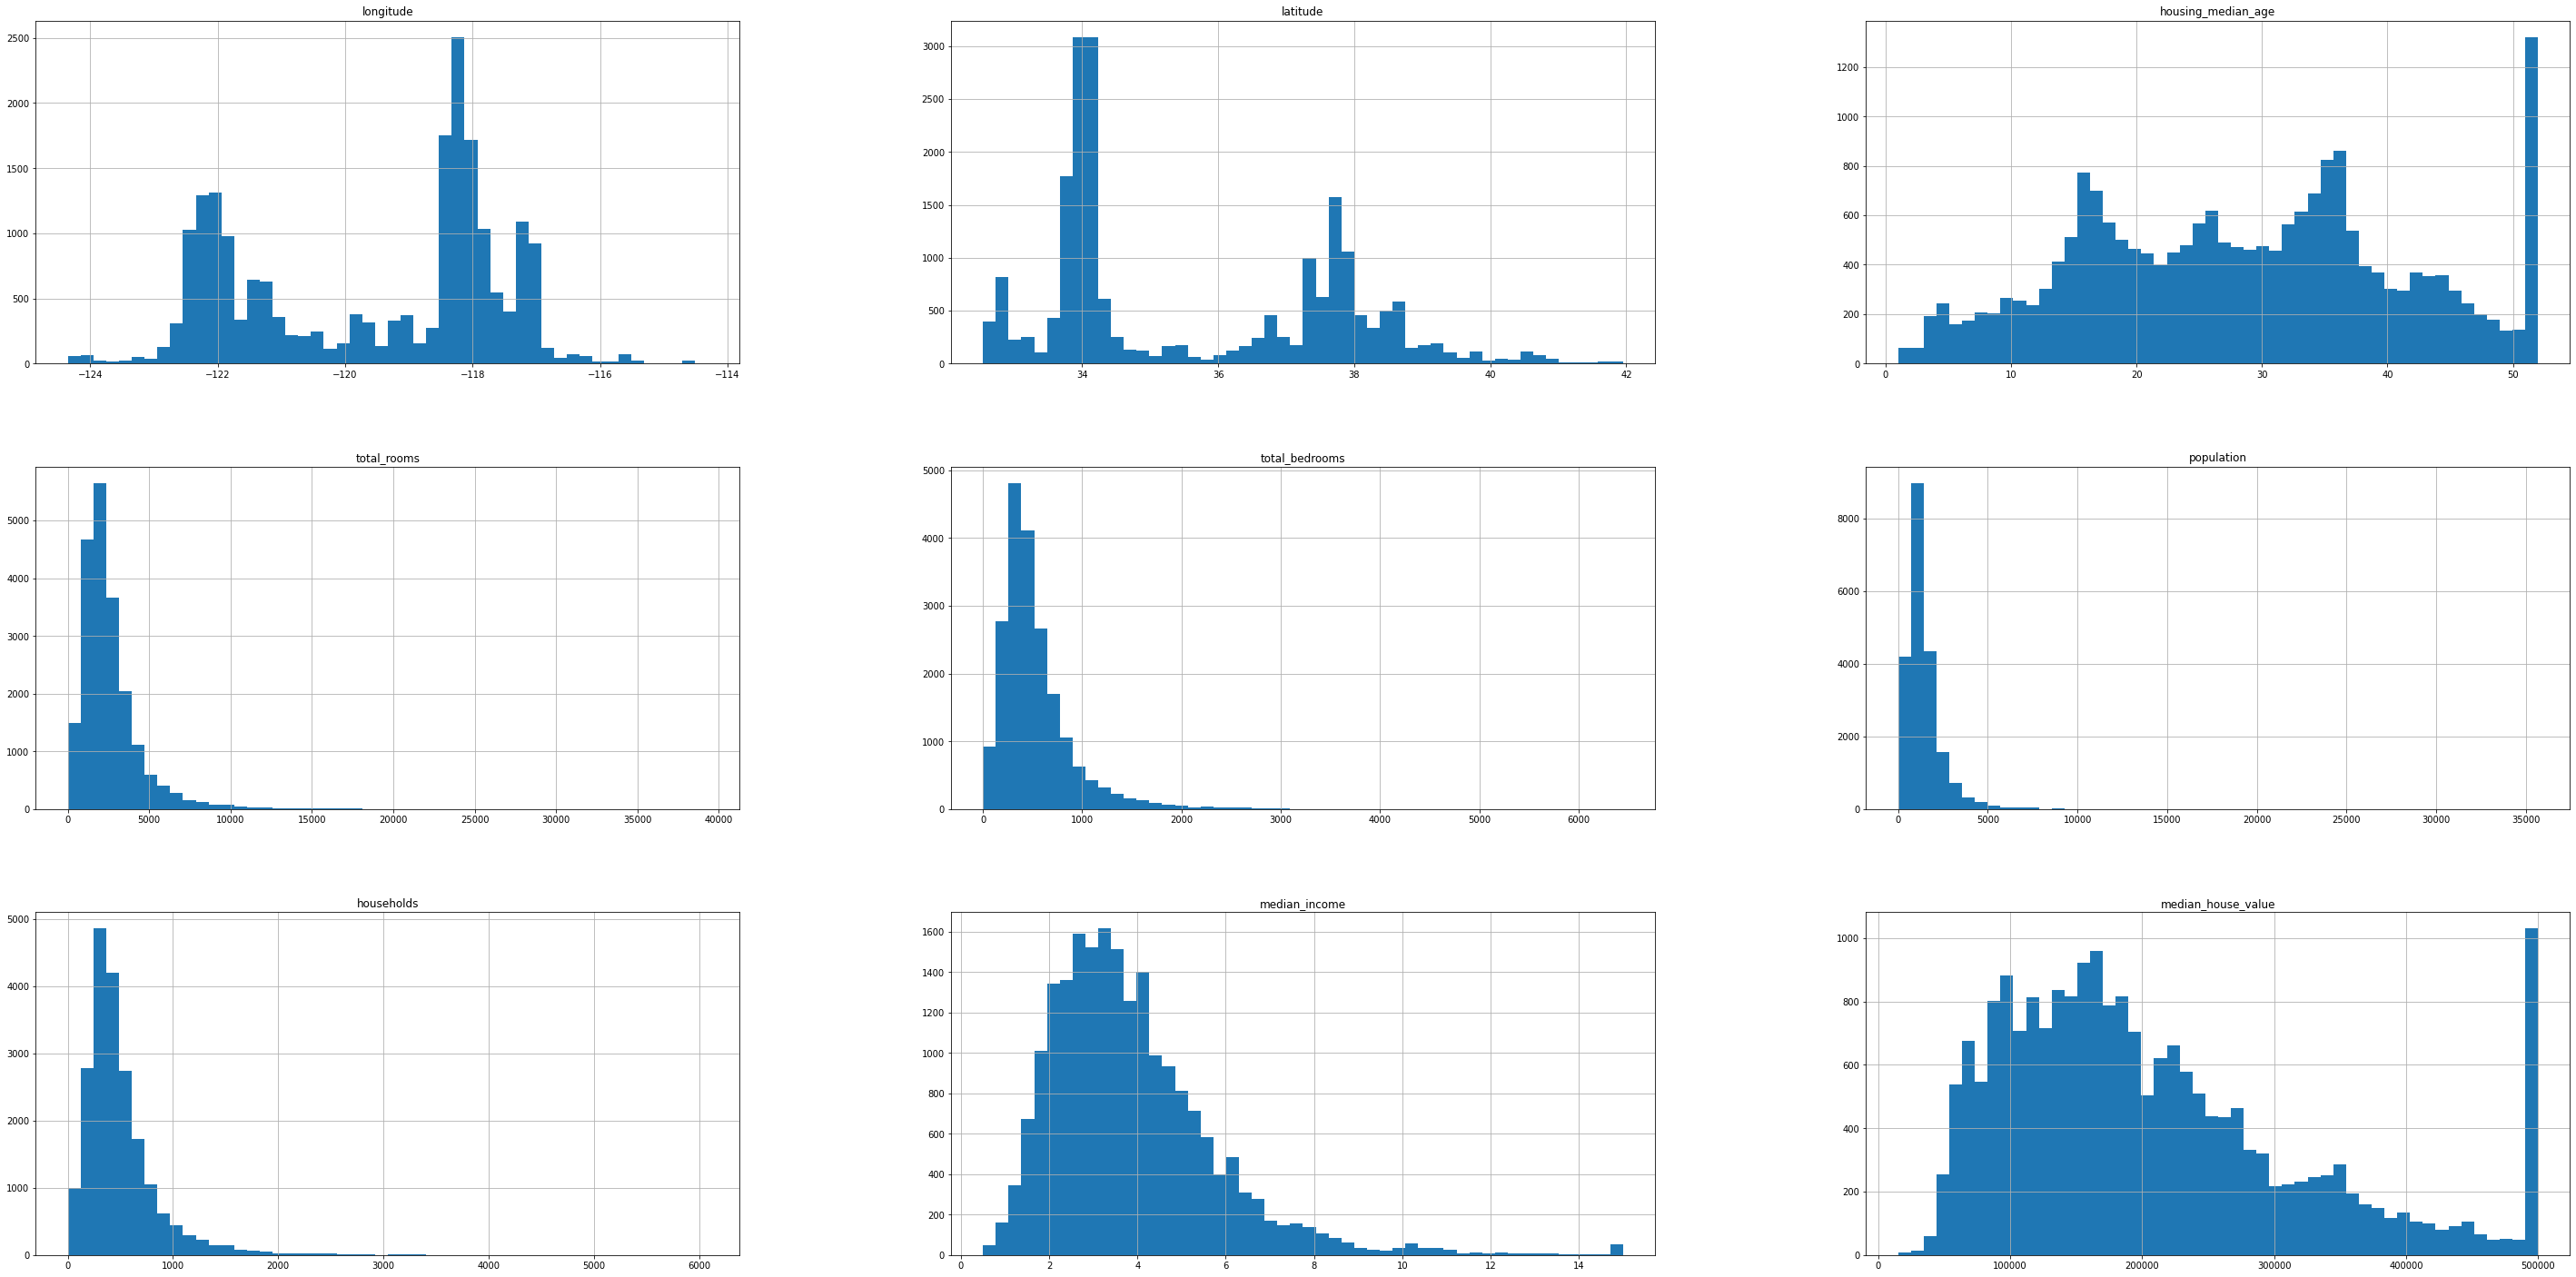

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(50, 25))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)

In [9]:
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND
12462,-121.43,38.57,38.0,2507.0,446.0,888.0,448.0,4.0972,163700.0,INLAND
19813,-119.26,36.61,33.0,560.0,90.0,310.0,113.0,2.5417,118800.0,INLAND
11229,-117.93,33.80,29.0,1672.0,267.0,891.0,281.0,4.8611,231900.0,<1H OCEAN
16696,-120.62,35.11,18.0,2241.0,544.0,1521.0,509.0,2.0292,155800.0,<1H OCEAN
13564,-117.29,34.15,42.0,1811.0,345.0,856.0,352.0,2.9667,97000.0,INLAND


In [10]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9288,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,435900.0,NEAR BAY
1878,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,110500.0,INLAND
20439,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,264100.0,<1H OCEAN
10957,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,187200.0,<1H OCEAN
10316,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,304900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
13044,-121.13,38.47,16.0,2574.0,441.0,1041.0,428.0,3.6645,203400.0,INLAND
11419,-117.96,33.69,20.0,3123.0,441.0,1319.0,432.0,6.0910,290400.0,<1H OCEAN
1804,-122.33,37.93,34.0,2326.0,471.0,1356.0,441.0,2.3475,90300.0,NEAR BAY
7136,-118.10,34.02,37.0,1022.0,232.0,653.0,238.0,3.0625,189400.0,<1H OCEAN


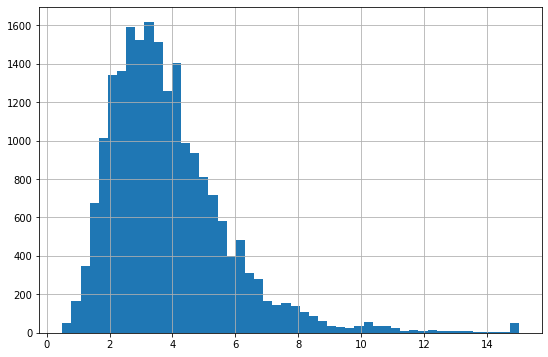

In [11]:
from pandas.core.indexes.api import InvalidIndexError
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9, 6))
plt.show()

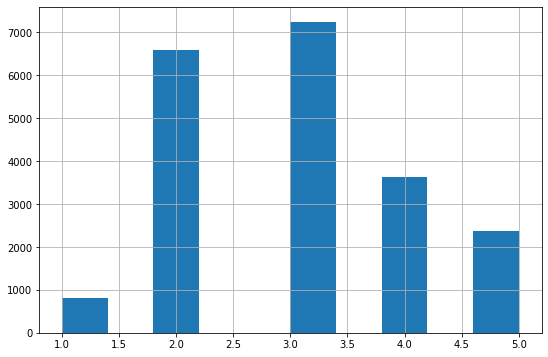

In [12]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
df['income_cat'].hist(figsize=(9, 6))
plt.show()

In [13]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3922,-118.56,34.19,35.0,782.0,144.0,425.0,140.0,5.4548,201400.0,<1H OCEAN,4
6591,-118.19,34.19,34.0,2061.0,260.0,825.0,254.0,15.0001,500001.0,<1H OCEAN,5
14850,-117.07,32.67,28.0,2758.0,623.0,2179.0,631.0,2.3814,112300.0,NEAR OCEAN,2
14773,-117.07,32.56,9.0,3648.0,895.0,3293.0,840.0,3.0992,142600.0,NEAR OCEAN,3
6671,-118.11,34.16,52.0,1353.0,274.0,852.0,306.0,3.4583,239900.0,INLAND,3


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [15]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


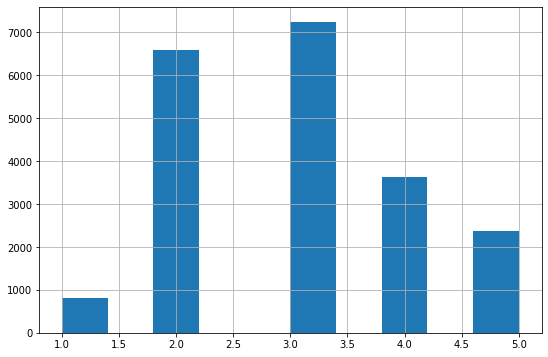

In [16]:
df['income_cat'].hist(figsize=(9, 6))
plt.show()

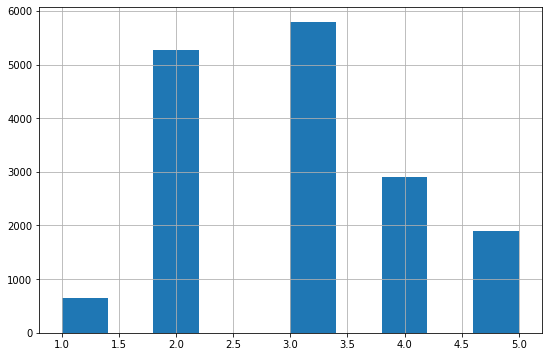

In [17]:
strat_train_set['income_cat'].hist(figsize=(9, 6))
plt.show()

In [18]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

In [19]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<img src="https://www.nationsonline.org/maps/USA/California_map.jpg"
alt="California" width="600"/>

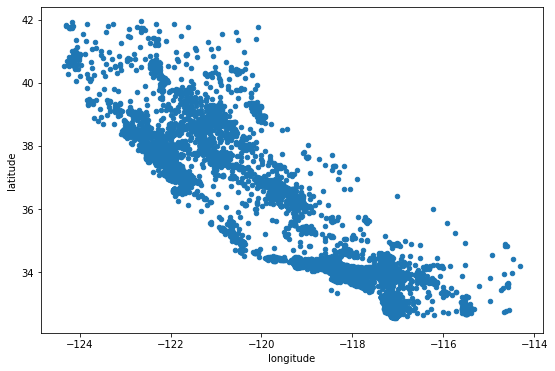

In [21]:
housing.plot(kind='scatter', x="longitude", y='latitude', figsize=(9, 6))
plt.show()

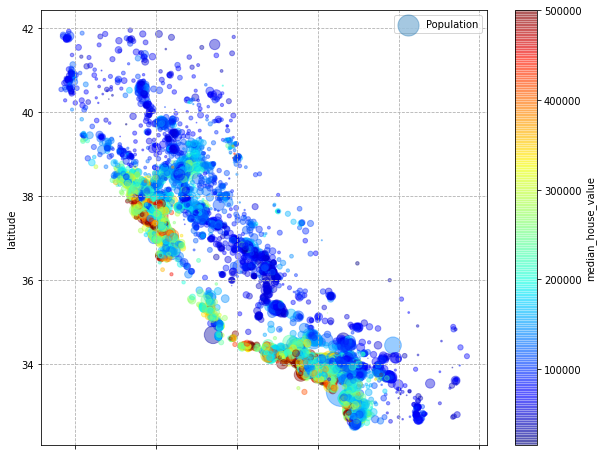

In [35]:
housing.plot(
    kind='scatter', 
    y='latitude',
    x='longitude',
    alpha=0.4,
    s=housing['population']/40, # nuqta radiusi ahali soniga qarab o'zgaradi
    label="Population",
    c='median_house_value',
    cmap='jet', #ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(10, 8)
    )
plt.grid(linestyle="--")
plt.show(
)

In [36]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
dtype: float64

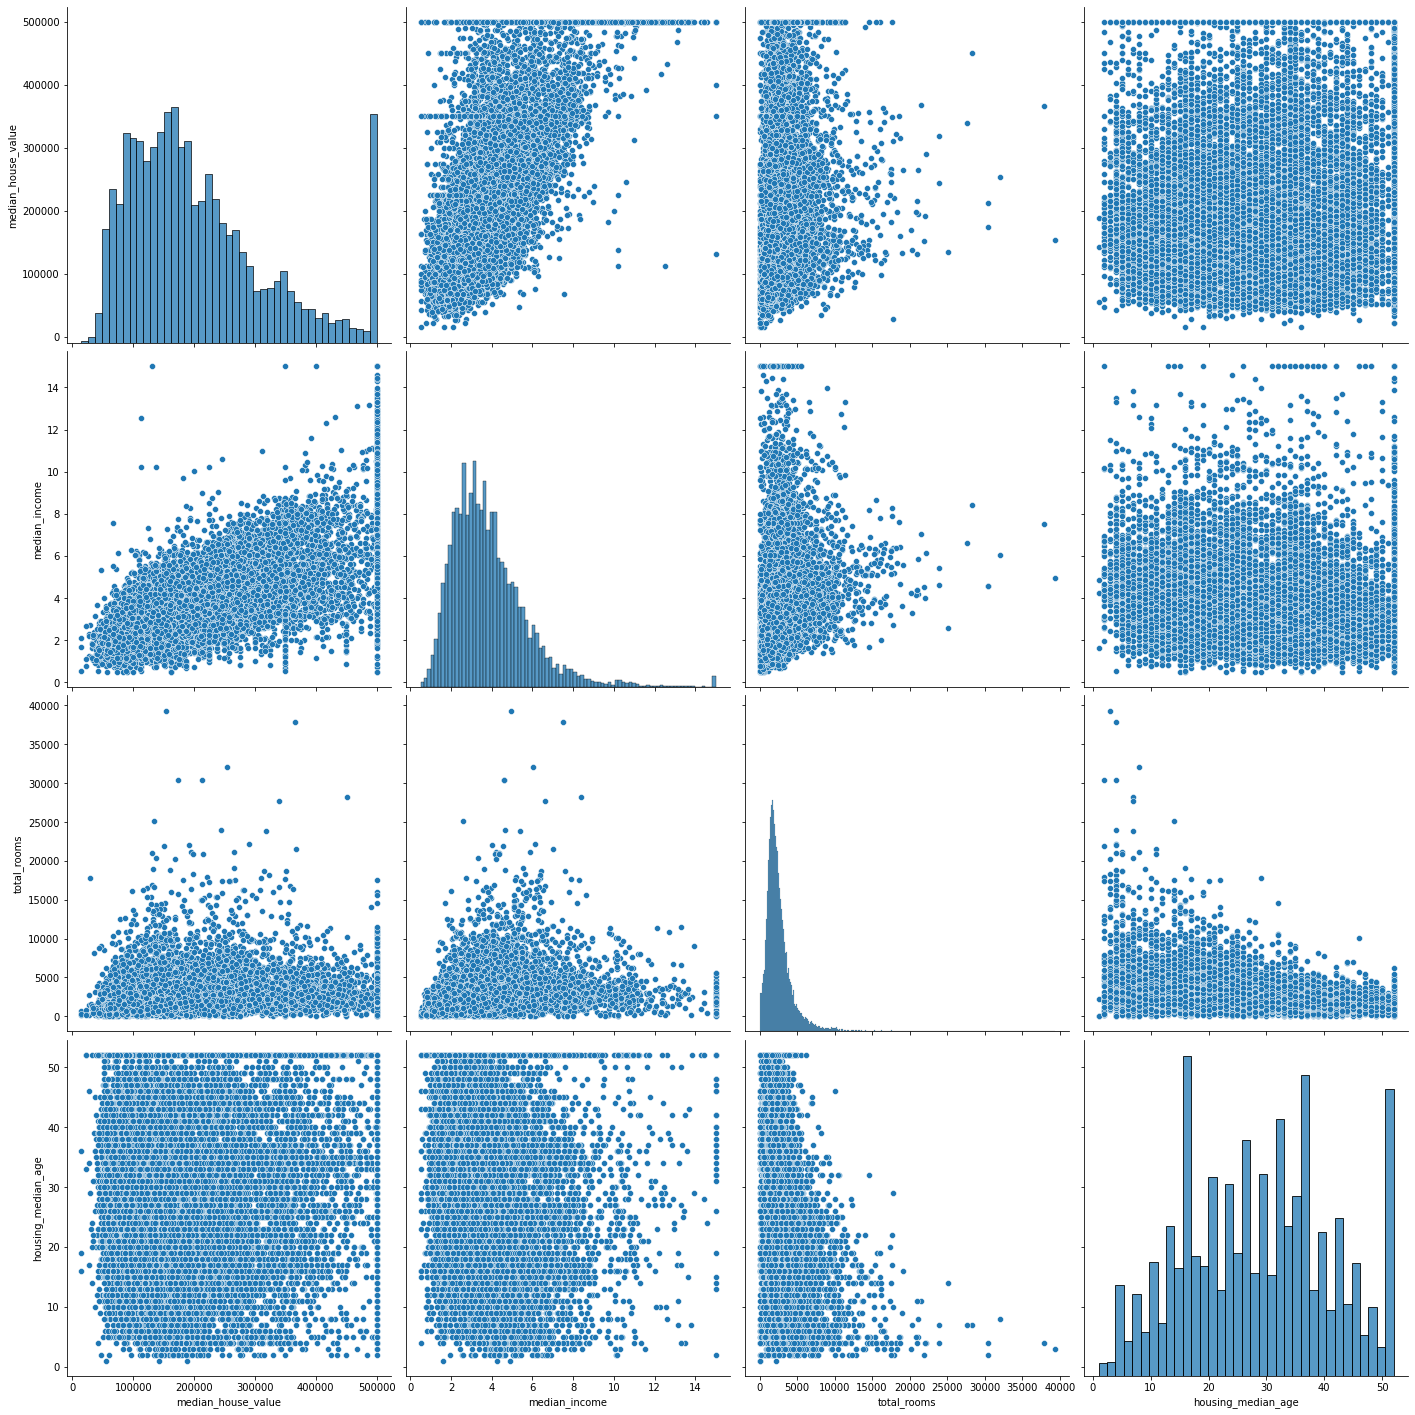

In [37]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

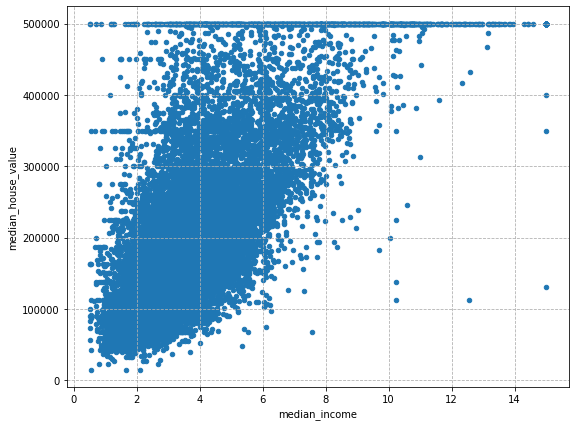

In [48]:
housing.plot(kind='scatter', x='median_income', y="median_house_value", alpha=1, figsize=(9, 7))
plt.grid(linestyle="--")
plt.show()

In [49]:
housing['rooms_per_househod'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['populations_per_household'] = housing['population']/housing['households']

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_househod,bedrooms_per_room,populations_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [51]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
rooms_per_househod           0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
populations_per_household   -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
dtype: float64

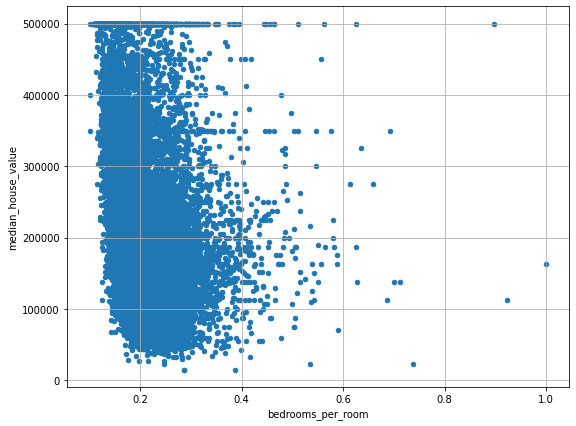

In [53]:
housing.plot(kind='scatter', x='bedrooms_per_room', y='median_house_value', figsize=(9, 7))
plt.grid()
plt.show()